# Proyecto Final:   
# Red Neuranal para predecir las dificultades de pago 
# de la empresa HOME CREDIT, Filipinas
## Estudiantes:
## Daniel Enríque Menéndez Gómez 
## Alicia Verónica Beltrán Sánchez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos = pd.read_csv("application_train.csv")
datos = pd.read_csv("application_train.csv")
datos = datos[["TARGET","NAME_CONTRACT_TYPE",
              "CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY",
              "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT",
              "NAME_FAMILY_STATUS","DAYS_EMPLOYED",
              "DAYS_REGISTRATION","OWN_CAR_AGE","FLAG_MOBIL",
              "FLAG_EMP_PHONE",
              "CNT_FAM_MEMBERS","REG_REGION_NOT_LIVE_REGION",
              "DAYS_LAST_PHONE_CHANGE",
              "WEEKDAY_APPR_PROCESS_START"]]

tomamos la base de datos application_train.csv con las siguientes variables:
1. TARGET: Dificultades de pago
2. NAME_CONTRACT_TYPE: Identifica si el prestamo es efectivo(1) o revolvente
3. CODE_GENDER: Género del cliente
4. FLAG_OWN_CAR: Inidica si el cliente posee auto
5. FLAG_OWN_REALTY: Indica si el cliente posee casa.
6. CNT_CHILDREN: Número de hijos del cliente
7. AMT_INCOME_TOTAL: Ingresos del cliente
8. AMT_CREDIT: Monto del préstamo
9. NAME_FAMILY_STATUS: Estado civil del cliente
10. DAYS_EMPLOYED: Dias trabajando hasta pedir el préstamo
11. DAYS_REGISTRATION: ¿Cuántos días antes de la solicitud el cliente cambió el documento de identidad con el que solicitó el   préstamo?
12. OWN_CAR_AGE: Edad del automóvil del cliente
13. FLAG_MOBIL: Proporciono el cliente un telefono móvil?
14. FLAG_EMP_PHONE: Proporciono  teléfono del trabajo?
15. CNT_FAM_MEMBERS: Miembros de la familia
16. REG_REGION_NOT_LIVE_REGION : LA dirección del cliente coincide con la que proporciono
17. DAYS_LAST_PHONE_CHANGE: ¿Cuántos días antes de la aplicación el cliente cambió de teléfono?
18. WEEKDAY_APPR_PROCESS_START: Día de la semana que el cliente inicio el proceso

Mostramos los datos de los primeros 21 clientes de las primeras 5 variables

In [2]:
datos.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,DAYS_LAST_PHONE_CHANGE,WEEKDAY_APPR_PROCESS_START
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,Single / not married,-637,-3648.0,NaN,1,1,1.0,0,-1134.0,WEDNESDAY
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,Married,-1188,-1186.0,NaN,1,1,2.0,0,-828.0,MONDAY
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Single / not married,-225,-4260.0,26.0,1,1,1.0,0,-815.0,MONDAY
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,Civil marriage,-3039,-9833.0,NaN,1,1,2.0,0,-617.0,WEDNESDAY
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,Single / not married,-3038,-4311.0,NaN,1,1,1.0,0,-1106.0,THURSDAY


## Análisis Univariado

### variable TARGET

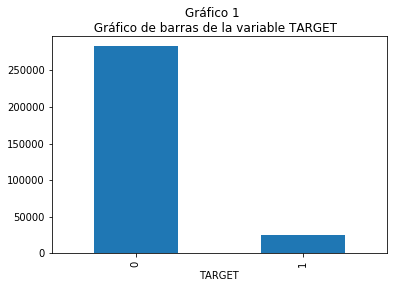

In [3]:
datos.groupby("TARGET")["TARGET"].count().plot(kind='bar')
plt.suptitle("Gráfico 1 \n Gráfico de barras de la variable TARGET")
fig=plt.show()

La variable TARGET es nuestra variable respuesta que indica si el cliente tuvo dificultades de pago, podemos observar en el gráfico que son pocos los clientes que presentaron dificultades de pago en comparación a los que no presentaron ninguna dificultad.

### Variable NAME_CONTRACT_TYPE

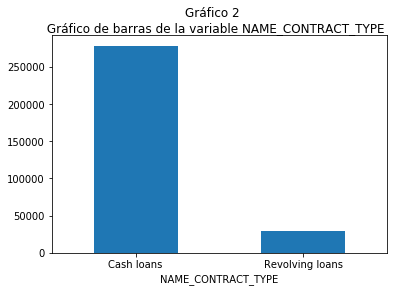

In [5]:
datos.groupby("NAME_CONTRACT_TYPE")["NAME_CONTRACT_TYPE"].count().plot(kind='bar',rot=0)
plt.suptitle("Gráfico 2 \n Gráfico de barras de la variable NAME_CONTRACT_TYPE")
plt.show()

NAME_CONTRACT_TYPE nos indica si el préstamo esen efectivo o revolvente, el gráfico nos indica que la mayoría de los créditos son en efectivo. 

### Variable CODE_GENDER

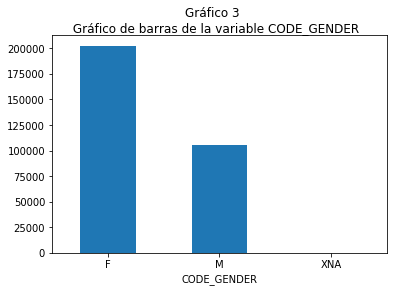

In [6]:
datos.groupby("CODE_GENDER")["CODE_GENDER"].count().plot(kind='bar',rot=0)
plt.suptitle("Gráfico 3 \n Gráfico de barras de la variable CODE_GENDER")
plt.show()

La variable CODE_GENDER nos indica el género de la persona, según el gráfico son mas hombres que mujeres los que solitan créditos.

### Variable FLAG_OWN_CAR

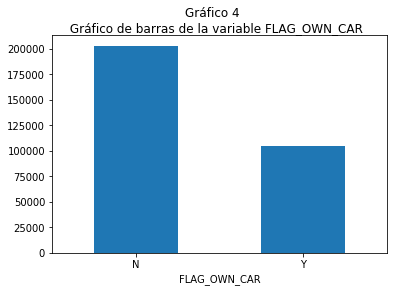

In [7]:
datos.groupby("FLAG_OWN_CAR")["FLAG_OWN_CAR"].count().plot(kind='bar',rot=0)
plt.suptitle("Gráfico 4 \n Gráfico de barras de la variable FLAG_OWN_CAR")
plt.show()

La variable FLAG_OWN_CAR indica si el cliente posee auto, podemos observar en el gráfico que la mayoria de clientes que solicitan crédito poseen auto.

### Variable FLAG_OWN_REALTY

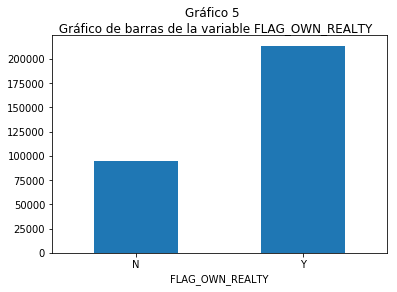

In [8]:
datos.groupby("FLAG_OWN_REALTY")["FLAG_OWN_REALTY"].count().plot(kind='bar',rot=0)
plt.suptitle("Gráfico 5 \n Gráfico de barras de la variable FLAG_OWN_REALTY")
plt.show()

La variable FLAW_OWN_REALTY indica si el cliente posee casa o apartamento, el gráfico nos indica que casi el doble de los clientes que no poseen casa o apartamento, si poseen casa o apartamento

### Variable CNT_CHILDREN

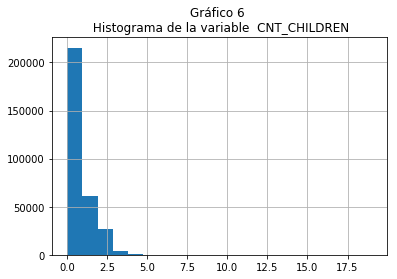

In [9]:
datos.hist(column="CNT_CHILDREN",bins=20)
plt.title("Gráfico 6 \n Histograma de la variable  CNT_CHILDREN")
plt.show()

La variable CNT_CHILDREN nos indica el número de hijos del cliente, podemos notar que la cantidad de hijos de los clientes está ente 0 y 19, gran parte de ellos tienen entre 0 y 1 hijos.

In [10]:
print(datos["CNT_CHILDREN"].describe())

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


### Variable AMT_INCOME_TOTAL

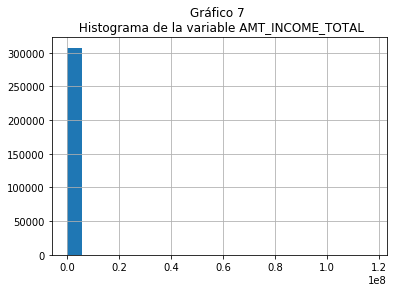

In [11]:
datos.hist(column="AMT_INCOME_TOTAL",bins=20)
plt.title("Gráfico 7 \n Histograma de la variable AMT_INCOME_TOTAL")
plt.show()

La variable AMT_INCOME_TOTAL indica los ingresos totales del cliente en pesos filipinos, podemos ver que existe una gran desigualdad en cuanto a los ingresos del cliente, tenemos una desviación estándar bastante alta de 233,712.31 pesos filipinos

In [12]:
print(datos["AMT_INCOME_TOTAL"].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


### Variable AMT_CREDIT

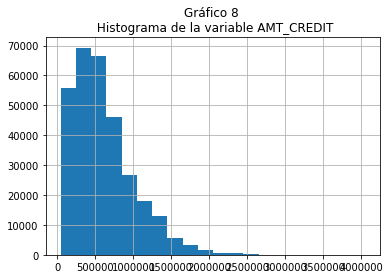

In [13]:
datos.hist(column="AMT_CREDIT",bins=20)
plt.title("Gráfico 8 \n Histograma de la variable AMT_CREDIT")
plt.show()

La variable AMT_CREDIT indica el monto del crédito, tenemos un mínimo, 450,000 pesos filipinos y un máximo de 4,050,000 pesos filipinos

In [14]:
print(datos["AMT_CREDIT"].describe())

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


### variable NAME_FAMILY_STATUS

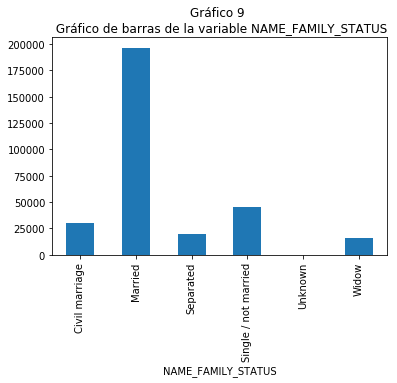

In [15]:
datos.groupby("NAME_FAMILY_STATUS")["NAME_FAMILY_STATUS"].count().plot(kind='bar',rot=90,left=0.2)
plt.title("Gráfico 9 \n Gráfico de barras de la variable NAME_FAMILY_STATUS")
plt.show()

La variable NAME_FAMILY_ESTATUS nos indica el estado civil del cliente, podemos observar en el gráfico que la mayoria de los clientes son casados, y muy pocos no dieron su estado civil.

### Variable DAYS_EMPLOYED

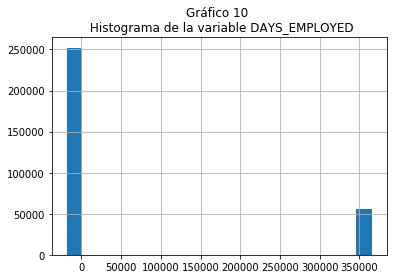

In [16]:
datos.hist(column="DAYS_EMPLOYED",bins=20)
plt.title("Gráfico 10 \n Histograma de la variable DAYS_EMPLOYED")
plt.show()

La variable DAYS_EMPLOYED indica la cantidad de dias trabajados antes a la solicitud del préstamo

In [17]:
print(datos["DAYS_EMPLOYED"].describe())

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


### Variable DAYS_REGISTRATION

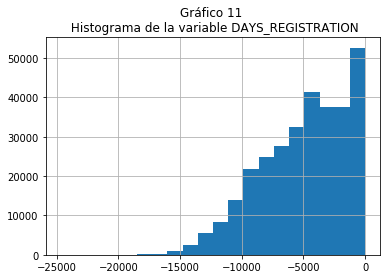

In [18]:
datos.hist(column="DAYS_REGISTRATION",bins=20)
plt.title("Gráfico 11 \n Histograma de la variable DAYS_REGISTRATION")
plt.show()

La variable DAYS_REGISTRATION indica cuántos días antes de la solicitud el cliente cambió el documento de identidad con el que solicitó el préstamo, podemos ver en el gráfico que son relativamente pocos los que tienen abajo de 1000 dias antes de haber cambiado el documento de identidad.

In [19]:
print(datos["DAYS_REGISTRATION"].describe())

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


### Variable OWN_CAR_AGE

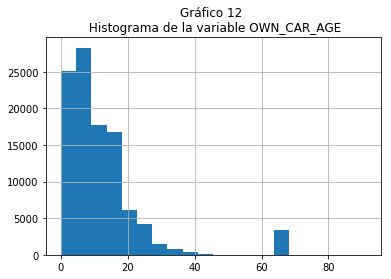

In [20]:
datos.hist(column="OWN_CAR_AGE",bins=20)
plt.title("Gráfico 12 \n Histograma de la variable OWN_CAR_AGE")
plt.show()

La variable OWN_CARE_AGE nos indica la edad en años del carro, el promedio de la edad del carro es de 12 años, y una edad máxima de 91 años.

In [21]:
print(datos["OWN_CAR_AGE"].describe())

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


### Variable FLAG_MOBIL

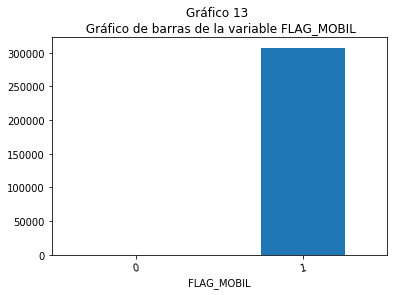

In [22]:
datos.groupby("FLAG_MOBIL")["FLAG_MOBIL"].count().plot(kind='bar',rot=12)
plt.title("Gráfico 13 \n Gráfico de barras de la variable FLAG_MOBIL")
plt.show()

La variable FLAG_MOBIL indica si el cliente proporcionó un número de teléfono móvil, podemos ver que la mayoria  de clientes casi en su totalidad proporcionan un número de teléfono móvil. además en la infomación de abajo podemos ver que solamente un cliente no proporcionó el número de teléfono móvil.

In [23]:
datos.groupby("FLAG_MOBIL")["FLAG_MOBIL"].count()

FLAG_MOBIL
0         1
1    307510
Name: FLAG_MOBIL, dtype: int64

### Variable CNT_FAM_MEMBERS

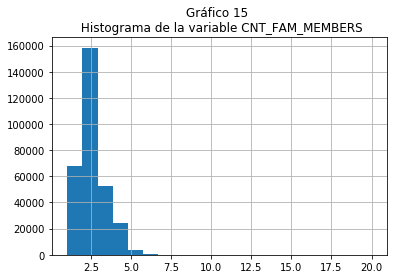

In [24]:
datos.hist(column="CNT_FAM_MEMBERS",bins=20)
plt.title("Gráfico 15 \n Histograma de la variable CNT_FAM_MEMBERS")
plt.show()

La variable CNT_FAM_MEMBERS proporciona el número de integrantes de la familia del cliente, en promedio tienen dos integrantes, con un mínimo de 20 integrantes y un mínimo de 1.  

In [25]:
print(datos["CNT_FAM_MEMBERS"].describe())

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


### Variable REG_REGION_NOT_LIVE_REGION

datos.groupby("REG_REGION_NOT_LIVE_REGION")["REG_REGION_NOT_LIVE_REGION"].count().plot(kind='bar',rot=0)
plt.title("Gráfico 16 \n Gráfico de barras de la variable REG_REGION_NOT_LIVE_REGION")
plt.show()

La variable REG_REGION_NOT_LIVE_REGION nos indica si la dirección proporcionada por el cliente coincide. podemos notar que en su mayoria la dirección coincide.

### Variable DAYS_LAST_PHONE_CHANGE

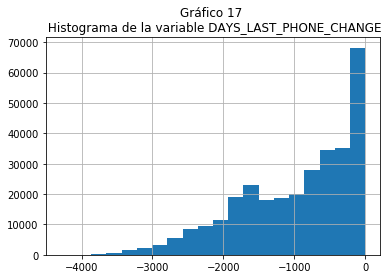

In [26]:
datos.hist(column="DAYS_LAST_PHONE_CHANGE",bins=20)
plt.title("Gráfico 17 \n Histograma de la variable DAYS_LAST_PHONE_CHANGE")
plt.show()

La variable DAYS_LAST_PHONE_CHANGE indica cuántos días antes de la aplicación el cliente cambió de teléfono, en promedio los clientes cambiaron su teléfono 963 dias atrás. 

In [27]:
print(datos["DAYS_LAST_PHONE_CHANGE"].describe())

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


### Variable WEEKDAY_APPR_PROCESS_START

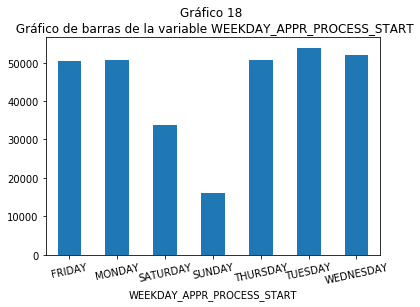

In [28]:
datos.groupby("WEEKDAY_APPR_PROCESS_START")["WEEKDAY_APPR_PROCESS_START"].count().plot(kind='bar',rot=12)
plt.title("Gráfico 18 \n Gráfico de barras de la variable WEEKDAY_APPR_PROCESS_START")
plt.show()

La variable WEEKDAY_APPR_PROCESS_START indica el día de la semana que el cliente inicio el proceso, podemos ver el gráfico que entre semana la cantidad de clientes que solicitan préstamo son bastante similares pero se nota una baja en los dias sábado y aún más domingo.

# Análisis bivariado

###  TARGET vrs CNT_CHILDEN 

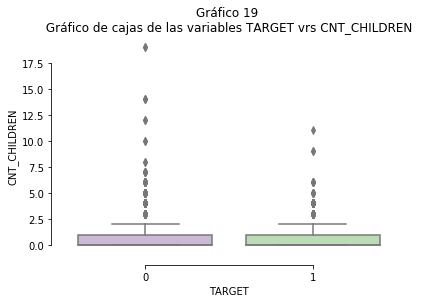

In [32]:
import seaborn as sns
sns.boxplot(x="TARGET", y="CNT_CHILDREN", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 19 \n Gráfico de cajas de las variables TARGET vrs CNT_CHILDREN ")
plt.show()

Podemos ver que la cantidad de hijos son más dispersos para los clientes 
que no tuvieron dificultades de pago, mientras que los que tuvieron dificultades se concentran más próximos a la media

### TARGET  vrs AMT_INCOME_TOTAL


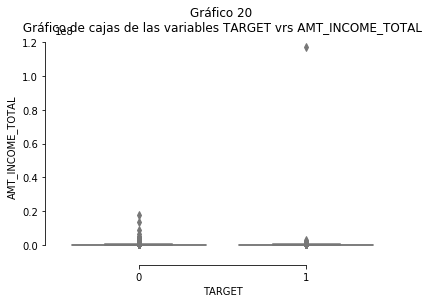

In [33]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 20 \n Gráfico de cajas de las variables TARGET vrs AMT_INCOME_TOTAL ")
plt.show()

Podemos notar un punto demasiado alejado de la media, en el caso cuando el cliente no tiene dificultades de pago

In [34]:
datos= datos[datos["AMT_INCOME_TOTAL"]!=max(datos["AMT_INCOME_TOTAL"])]

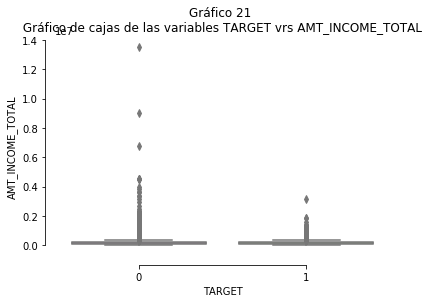

In [39]:
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 21 \n Gráfico de cajas de las variables TARGET vrs AMT_INCOME_TOTAL ")
plt.show()

Podemos notar que al quitar ese punto el gráfico varia en gran medida, por lo que era necesario quitarlo. 

### TARGET vrs AMT_CREDIT

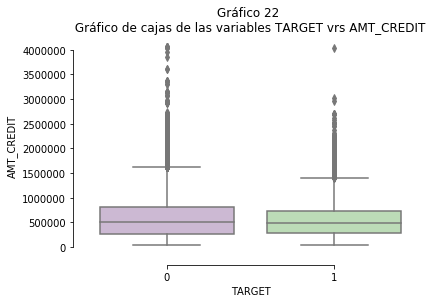

In [40]:
sns.boxplot(x="TARGET", y="AMT_CREDIT", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 22 \n Gráfico de cajas de las variables TARGET vrs AMT_CREDIT ")
plt.show()


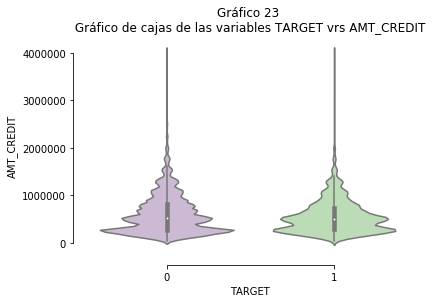

In [41]:
sns.violinplot(x="TARGET", y="AMT_CREDIT", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 23 \n Gráfico de cajas de las variables TARGET vrs AMT_CREDIT ")
plt.show()

Podemos ver en el gráfico que los montos de los préstamos tienen distribuciones similares para los clientes con difultades de pago y los que no tienen dificultades de pago

###  TARGET vrs DAYS_EMPLOYED 

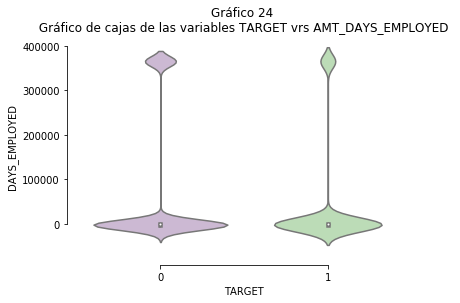

In [42]:
sns.violinplot(x="TARGET", y="DAYS_EMPLOYED", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 24 \n Gráfico de cajas de las variables TARGET vrs AMT_DAYS_EMPLOYED ")
plt.show()


Se puede apreciar en el gráfico que de los clientes con pocos dias atrás trabajados son más frecuentes los que no presentaron 
presentaron dificultades para pagar, de manera similar con los tenian muchos dias atrás de trabajar

### TARGET vrs DAYS_REGISTRATION

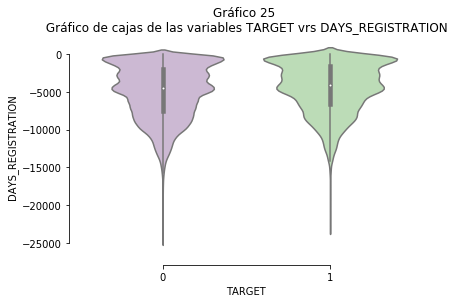

In [43]:
sns.violinplot(x="TARGET", y="DAYS_REGISTRATION", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 25 \n Gráfico de cajas de las variables TARGET vrs DAYS_REGISTRATION ")
plt.show()

En el gráfico se puede apreciar que las distribuciones y las frecuencias de días antes de la solicitud en el que 
el cliente cambió el documento de identidad con el que solicitó el préstamo se comportan de manera similar para
los clientes que presentaron dificultades de pago como para los que no presentaron dificultades de pago

###  TARGET vrs OWN_CAR_AGE

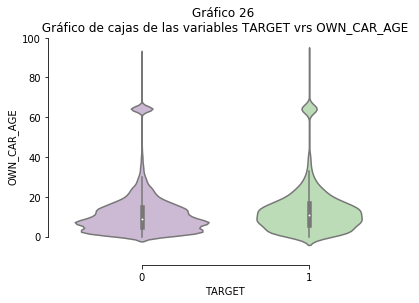

In [44]:
sns.violinplot(x="TARGET", y="OWN_CAR_AGE", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 26 \n Gráfico de cajas de las variables TARGET vrs OWN_CAR_AGE ")
plt.show()

Podemos observar que la edad del carro del cliente las frecuencias estan concentradas entre cero y cuarenta años, y además
esas edades son más frecuentes en los que no presentaron dificultades de pago

### TARGET vrs CNT_FAM_MEMBERS

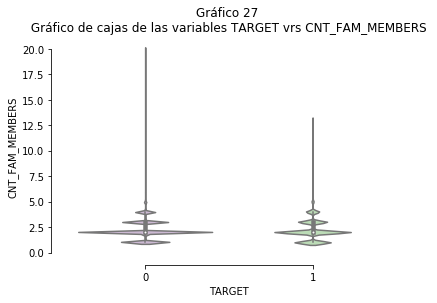

In [45]:
sns.violinplot(x="TARGET", y="CNT_FAM_MEMBERS", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 27 \n Gráfico de cajas de las variables TARGET vrs CNT_FAM_MEMBERS ")
plt.show()

Nótese en el gráfico que en cuanto al número de integrantes de la familia del cliente las distribuciones y las frecuentas
son muy distintas para las personas que preentaron dificultades de pago y las que no presentaron dificultades de pago.

### TARGET vrs  DAYS_LAST_PHONE_CHANGE

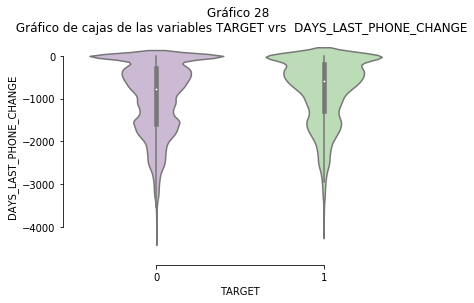

In [46]:
sns.violinplot(x="TARGET", y="DAYS_LAST_PHONE_CHANGE", data=datos, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title("Gráfico 28 \n Gráfico de cajas de las variables TARGET vrs  DAYS_LAST_PHONE_CHANGE")
plt.show()

En el gráfico se puede apreciar que las distribuciones y las frecuencias de días antes en el que el cliente cambió de  
teléfono  se comportan de manera similar para los clientes que presentaron dificultades de pago como para los que no 
presentaron dificultades de pago.

### TARGET vrs NAME_CONTRACT_TYPE

In [47]:
print(datos.groupby(["TARGET", "NAME_CONTRACT_TYPE"])["TARGET", "NAME_CONTRACT_TYPE"].count())


                           TARGET  NAME_CONTRACT_TYPE
TARGET NAME_CONTRACT_TYPE                            
0      Cash loans          255010              255010
       Revolving loans      27675               27675
1      Cash loans           23220               23220
       Revolving loans       1604                1604


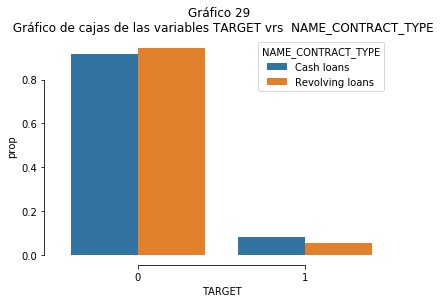

In [48]:
x, y, hue =  "TARGET", "prop", "NAME_CONTRACT_TYPE"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 29 \n Gráfico de cajas de las variables TARGET vrs  NAME_CONTRACT_TYPE")
plt.show()

Podemos apreciar en el gráfico como en la tabla de doble entrada que de los clientes que no presentaron dificultades de pago 
el crédito más frecuente es el de tipo revolvente, mientras de los que presentaron dificultades de pago el crédito más 
frecuente es el de tipo efectivo.

### TARGET vrs CODE_GENDER

In [49]:
print(datos.groupby(["TARGET", "CODE_GENDER"])["TARGET", "CODE_GENDER"].count())

                    TARGET  CODE_GENDER
TARGET CODE_GENDER                     
0      F            188278       188278
       M             94403        94403
       XNA               4            4
1      F             14169        14169
       M             10655        10655


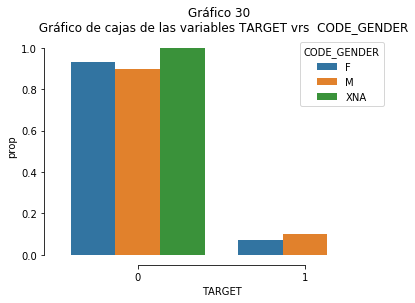

In [50]:
x, y, hue =  "TARGET", "prop", "CODE_GENDER"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 30 \n Gráfico de cajas de las variables TARGET vrs  CODE_GENDER")
plt.show()

Tanto en el gráfico como en la tabla de doble entrada podemos ver que en los que no presentaron dificultades de pago son más
frecuentes los clientes que no definen su sexo, mientras que en los que presentaron dificultades de pago los hombres son más
frecuentes

### TARGET vrs FLAG_OWN_CAR

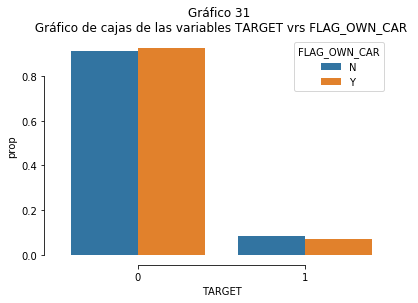

In [51]:
x, y, hue =  "TARGET", "prop", "FLAG_OWN_CAR"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 31 \n Gráfico de cajas de las variables TARGET vrs FLAG_OWN_CAR ")
plt.show()

El gráfico nos indica que de las personas que no preasentaron dificultades de pago son más frecuentes las que possen carro, coso contrario con las que si presentaron dificultades de pago

### TARGET vrs  FLAG_OWN_REALTY

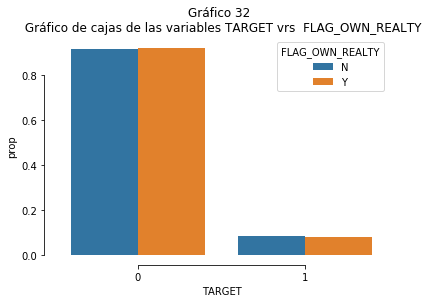

In [52]:
x, y, hue =  "TARGET", "prop", "FLAG_OWN_REALTY"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 32 \n Gráfico de cajas de las variables TARGET vrs  FLAG_OWN_REALTY")
plt.show()

El gráfico nos indica que los clientes que poseen casa son proporcionalmente iguales a las que no poseen casa
tanto en los clientes que presentaron dificultades de pago como en los que no

### TARGET vrs NAME_FAMILY_STATUS

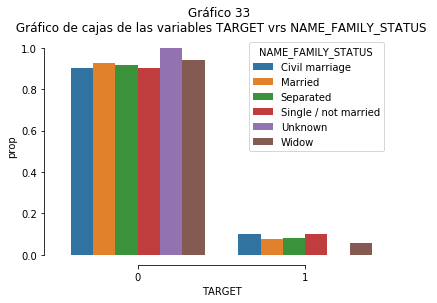

In [53]:
x, y, hue =  "TARGET", "prop", "NAME_FAMILY_STATUS"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 33 \n Gráfico de cajas de las variables TARGET vrs NAME_FAMILY_STATUS ")
plt.show()

El gráfico nos indica que de las personas que no presentaron dificultades de pago los más frecuentes no se conoce el estado
civil, y de los que presentaron difultades de pago los más fecuentes son casados por lo civil

### TARGET vrs FLAG_MOBIL

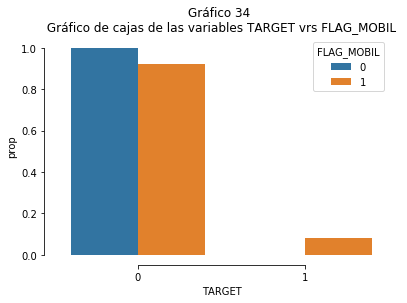

In [54]:
x, y, hue =  "TARGET", "prop", "FLAG_MOBIL"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 34 \n Gráfico de cajas de las variables TARGET vrs FLAG_MOBIL ")
plt.show()

El gráfico nos indica que de los clientes que no presentaron dificultades de pago son más frecuentes los que proporcionaron
un teléfono móvil , y de los que presentaron difultades de pago los más fecuentes no proporcionaron un teléfono móvil

### TARGET vrs FLAG_EMP_PHONE

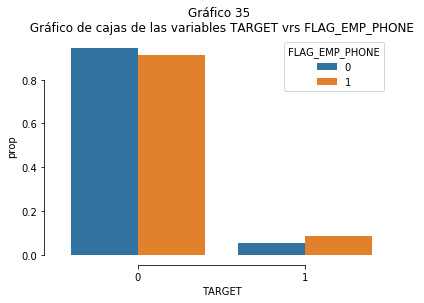

In [55]:
x, y, hue =  "TARGET", "prop", "FLAG_EMP_PHONE"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 35 \n Gráfico de cajas de las variables TARGET vrs FLAG_EMP_PHONE ")
plt.show()

El gráfico nos indica que de los clientes que no presentaron dificultades de pago son más frecuentes los que proporcionaron 
el teléfono del trabajo, y de los que presentaron difultades de pago los más fecuentes no proporcionaron el teléfono del 
trabajo

### TARGET vrs REG_REGION_NOT_LIVE_REGION

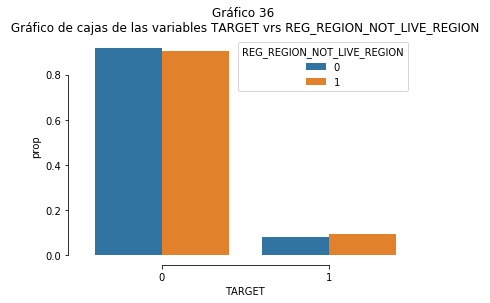

In [56]:
x, y, hue =  "TARGET", "prop", "REG_REGION_NOT_LIVE_REGION"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 36 \n Gráfico de cajas de las variables TARGET vrs REG_REGION_NOT_LIVE_REGION ")
plt.show()

El gráfico nos indica que de los clientes que no presentaron dificultades de pago son más los clientes a los que si 
les coincide la dirección que proporcionaron, y de los que presentaron difultades de pago son mas los clientes a los
que no les coincide la dirreción que proporcionaron.

### TARGET vrs WEEKDAY_APPR_PROCESS_START

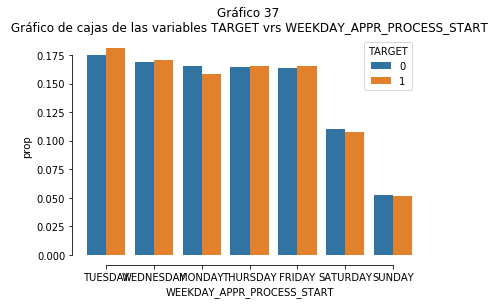

In [57]:
x, y, hue =  "WEEKDAY_APPR_PROCESS_START", "prop", "TARGET"


(datos[x]
 .groupby(datos[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

sns.despine(offset=10, trim=True)
plt.title("Gráfico 37 \n Gráfico de cajas de las variables TARGET vrs WEEKDAY_APPR_PROCESS_START ")

plt.show()

De acuerdo a los días en que se inicio el proceso podemos ver que el más frecuente es martes en el que son más los clientes
que presentaron dificulatades de pago, y el menos fecuente es el dia domingo en el que son bastante similares las cantidades
de los que presentaron difucultades de pago con los que no

## Preparación de los datos

Vamos a quitar las variables

* AMT_INCOME_TOTAL

* WEEKDAY_APPR_PROCESS_START


Ya que no muestran tener influencia en la variable TARGET



In [58]:
datos = datos.drop("AMT_INCOME_TOTAL",axis=1)

datos = datos.drop("WEEKDAY_APPR_PROCESS_START",axis=1)

### Variables dummies

Dummitazamos las siguientes variables 

* NAME_CONTRACT_TYPE: CASH loans, revolving loans
* CODE_GENDER: F,M,XNA
* FLAG_OWN_CAR: N,Y
* FLAG_OWN_REALTY: N,Y
* NAME_FAMILY_STATUS: civil marriage, Married, Separated, 
 Single/not married, unknow, widow


In [59]:
a = pd.get_dummies(datos['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE')
datos[a.columns]=a
datos=datos.drop("NAME_CONTRACT_TYPE",axis=1)

In [60]:
a = pd.get_dummies(datos['CODE_GENDER'],prefix='CODE_GENDER')
datos[a.columns]=a
datos=datos.drop("CODE_GENDER",axis=1)

In [61]:
a = pd.get_dummies(datos['FLAG_OWN_CAR'],prefix='FLAG_OWN_CAR')
datos[a.columns]=a
datos=datos.drop("FLAG_OWN_CAR",axis=1)

In [62]:
a = pd.get_dummies(datos['FLAG_OWN_REALTY'],prefix='FLAG_OWN_REALTY')
datos[a.columns]=a
datos=datos.drop("FLAG_OWN_REALTY",axis=1)

In [63]:
a = pd.get_dummies(datos['NAME_FAMILY_STATUS'],prefix='NAME_FAMILY_STATUS')
datos[a.columns]=a
datos=datos.drop("NAME_FAMILY_STATUS",axis=1)

In [64]:
datos.head()

,TARGET,CNT_CHILDREN,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,...,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow
0,1,0,406597.5,-637,-3648.0,NaN,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1293502.5,-1188,-1186.0,NaN,1,1,2.0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,135000.0,-225,-4260.0,26.0,1,1,1.0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,312682.5,-3039,-9833.0,NaN,1,1,2.0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,513000.0,-3038,-4311.0,NaN,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0


## Reemplazamos los valores faltantes con la media de la columna (imputación)

In [65]:
datos.fillna(datos.mean(),inplace=True)

,TARGET,CNT_CHILDREN,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,...,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow
0,1,0,406597.5,-637,-3648.0,12.061139,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1293502.5,-1188,-1186.0,12.061139,1,1,2.0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,135000.0,-225,-4260.0,26.000000,1,1,1.0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,312682.5,-3039,-9833.0,12.061139,1,1,2.0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,513000.0,-3038,-4311.0,12.061139,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0
5,0,0,490495.5,-1588,-4970.0,12.061139,1,1,2.0,0,...,1,0,0,1,0,1,0,0,0,0
6,0,1,1560726.0,-3130,-1213.0,17.000000,1,1,3.0,0,...,0,1,0,1,0,1,0,0,0,0
7,0,0,1530000.0,-449,-4597.0,8.000000,1,1,2.0,0,...,0,1,0,1,0,1,0,0,0,0
8,0,0,1019610.0,365243,-7427.0,12.061139,1,0,2.0,0,...,1,0,0,1,0,1,0,0,0,0
9,0,0,405000.0,-2019,-14437.0,12.061139,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0


In [66]:
datos.head()

,TARGET,CNT_CHILDREN,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,...,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow
0,1,0,406597.5,-637,-3648.0,12.061139,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,1293502.5,-1188,-1186.0,12.061139,1,1,2.0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,135000.0,-225,-4260.0,26.000000,1,1,1.0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,312682.5,-3039,-9833.0,12.061139,1,1,2.0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,513000.0,-3038,-4311.0,12.061139,1,1,1.0,0,...,1,0,0,1,0,0,0,1,0,0


In [67]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split # For splitting the data set
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE # This method is helpful to do oversampling
# The following web pages are good references: 

#https://beckernick.github.io/oversampling-modeling/
#https://github.com/scikit-learn-contrib/imbalanced-learn
    

/home/mate/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Dividimos nuestro conjunto de datos en 3:
* Entrenamiento
* Validación
* Prueba

In [68]:
TARGET = datos.TARGET

In [69]:
datos=datos.drop("TARGET",axis=1)

In [70]:
training_features, temp_features, training_target, temp_target = train_test_split(datos, 
                                                                                  TARGET, 
                                                                                  test_size = 0.2, 
                                                                                  random_state = 1234)

In [71]:
training_target.head()

242803    0
251704    0
199949    0
48196     0
81200     0
Name: TARGET, dtype: int64

In [72]:
training_target.value_counts()

0    226192
1     19815
Name: TARGET, dtype: int64

In [73]:
valid_features, test_features, valid_target, test_target = train_test_split(temp_features, 
                                                                            temp_target, 
                                                                            test_size = 0.5, 
                                                                            random_state = 1234)

In [74]:
valid_target.value_counts()

0    28163
1     2588
Name: TARGET, dtype: int64

In [75]:
test_target.value_counts()

0    28330
1     2421
Name: TARGET, dtype: int64

Es notorio que nos enfrentamos a un problema desbalanceado.

#### We convert the following variables:  valid_features, valid_target, test_features, test_target to numpyarray.

In [76]:
valid_features = valid_features.as_matrix()
test_features = test_features.as_matrix()

In [77]:
valid_target = to_categorical(valid_target)
test_target = to_categorical(test_target)

### Oversampling

In [78]:
sm = SMOTE(random_state=1234, ratio=1.0)

In [79]:
training_over_features, training_over_target = sm.fit_sample(training_features, training_target)

/home/mate/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [80]:
unique_elements, counts_elements = np.unique(training_over_target, return_counts=True)
print("Frequency of unique values of the target variable:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the target variable:
[[     0      1]
 [226192 226192]]


Nuestros datos ahora están balanceados

In [81]:
training_over_target = to_categorical(training_over_target)

## Modelación con keras

In [82]:
from sklearn.metrics import accuracy_score

In [111]:
def get_new_model():
    # Set up the model
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))

    # Add the output layer
    model.add(Dense(2, activation='softmax'))
    
    return(model)


In [112]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping 

from sklearn.metrics import accuracy_score

In [113]:
n_cols = training_over_features.shape[1]

In [114]:
# Build new model to test, unaffected by previous models
model = get_new_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(training_over_features, training_over_target, epochs=30, validation_split=0.1, callbacks=[early_stopping_monitor])


Train on 407145 samples, validate on 45239 samples
Epoch 1/30
407145/407145 [==============================] - 24s 60us/step - loss: 7.5898 - acc: 0.5291 - val_loss: 15.4198 - val_acc: 0.0433
Epoch 2/30
407145/407145 [==============================] - 24s 60us/step - loss: 7.6440 - acc: 0.5257 - val_loss: 14.4731 - val_acc: 0.1021
Epoch 3/30
407145/407145 [==============================] - 24s 59us/step - loss: 7.8213 - acc: 0.5148 - val_loss: 14.4731 - val_acc: 0.1021
Epoch 4/30
407145/407145 [==============================] - 24s 60us/step - loss: 7.8213 - acc: 0.5148 - val_loss: 14.4731 - val_acc: 0.1021


In [115]:
valid_predict = model.predict(valid_features)

## Set de validación

In [116]:
valid_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [117]:
def column_max(x):
    if x[0] >= x[1]:
        return 0
    else:
        return 1

In [118]:
valid_predict_bin = []
for i in range(valid_predict.shape[0]):
    valid_predict_bin.append(column_max(valid_predict[i]))
 

In [119]:
valid_target_bin = []
for i in range(valid_target.shape[0]):
    valid_target_bin.append(column_max(valid_target[i]))

In [120]:
accuracy_score(valid_predict_bin, valid_target_bin)

0.7821209066371825

La red se válida ya que clasifica de manera correcta el 78.21% de los datos

TEST

In [121]:
test_predict = model.predict(test_features)

In [122]:
test_predict_bin = []
for i in range(test_predict.shape[0]):
    test_predict_bin.append(column_max(test_predict[i]))


In [124]:
test_target_bin = []
for i in range(test_target.shape[0]):
    test_target_bin.append(column_max(test_target[i]))

In [125]:
accuracy_score(test_predict_bin, test_target_bin)

0.7876817014080842

la red generaliza correctamente los datos, generalizando el 78.77% de los datos siendo este un valor aceptable